In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import os
import healpy as hp

In [2]:
from my_functions import *

# Methods Figure: Synthetic Sample Sky Maps

0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0
0.0 180.0 -180.0 180.0


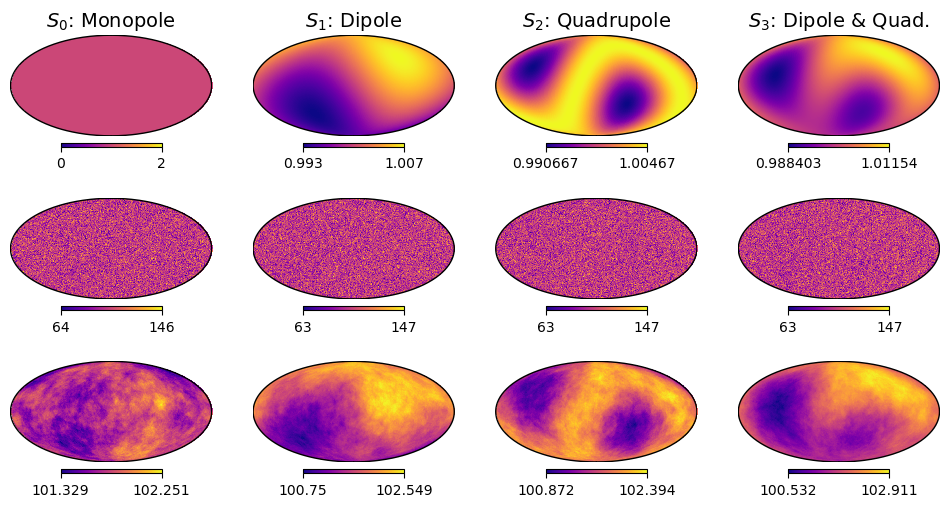

In [95]:
NSIDE = 64
NPIX = hp.nside2npix(NSIDE)
N_bar = 101.7

# Create the 3x4 grid
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 6))

# === MONOPOLE ===
# Raw
plt.axes(axes[0,0])
m = 1 + np.zeros(NPIX)
hp.mollview(m, cmap="plasma", title=r'$S_{0}$: Monopole', hold=True)
plt.gca().title.set_fontsize(14)

# Sampled
plt.axes(axes[1,0])
np.random.seed(123)
lambda_ = N_bar * np.ones(NPIX)
m = np.random.poisson(lambda_)
hp.mollview(m, cmap="plasma", title=None, hold=True)

# Smoothed
plt.axes(axes[2,0])
smooth_map = compute_smooth_map(m, angle_scale=1)
hp.mollview(smooth_map, cmap="plasma", title=None, hold=True)


# === DIPOLE ===
D = 0.007
dipole_theta = np.deg2rad(48)
dipole_phi = -np.deg2rad(360-264)
pixels = np.vstack(hp.pix2vec(NSIDE, np.arange(NPIX)))
dipole_vec = hp.ang2vec(dipole_theta, dipole_phi)
dot_product = np.dot(dipole_vec, pixels)
angles = np.arccos(dot_product)
dipole_signal = D*np.cos(angles)

# Raw
plt.axes(axes[0,1])
m = 1 + dipole_signal
hp.mollview(m, cmap="plasma", title=r'$S_{1}$: Dipole', hold=True)
plt.gca().title.set_fontsize(14)

# Sampled
plt.axes(axes[1,1])
np.random.seed(123)
m, lambda_ = dipole_sampling(NSIDE, N_bar, D, dipole_theta, dipole_phi)
hp.mollview(m, cmap="plasma", title=None, hold=True)

# Smoothed
plt.axes(axes[2,1])
smooth_map = compute_smooth_map(m, angle_scale=1)
hp.mollview(smooth_map, cmap="plasma", title=None, hold=True)


# === QUADRUPOLE ===
theta1, phi1 = np.deg2rad(90+27.1), -np.deg2rad(360-302.9)
theta2, phi2 = np.deg2rad(90-27.1), np.deg2rad(122.9)
q_vector_1 = [theta1, phi1]
q_vector_2 = [theta2, phi2]
pixels = hp.pix2vec(NSIDE, np.arange(NPIX))
a = hp.ang2vec(theta1, phi1)
b = hp.ang2vec(theta2, phi2)
Q_prime = np.outer(a, b)
Q_star = 0.5 * (Q_prime + Q_prime.T)
Q_hat = Q_star - (np.trace(Q_star)/3 * np.eye(3))
Q = 0.014
quadrupole_signal = Q * np.einsum('ij,i...,j...', Q_hat, pixels, pixels)

# Raw
plt.axes(axes[0,2])
m = 1 + quadrupole_signal
hp.mollview(m, cmap="plasma", title=r'$S_{2}$: Quadrupole', hold=True)
plt.gca().title.set_fontsize(14)

# Sampled
plt.axes(axes[1,2])
np.random.seed(123)
m, lambda_ = quadrupole_sampling(NSIDE, N_bar, Q, q_vector_1, q_vector_2)
hp.mollview(m, cmap="plasma", title=None, hold=True)

# Smoothed
plt.axes(axes[2,2])
smooth_map = compute_smooth_map(m, angle_scale=1)
hp.mollview(smooth_map, cmap="plasma", title=None, hold=True)


# === DIPOLE + QUADRUPOLE ===
# Raw
plt.axes(axes[0,3])
dipole_signal = D*np.cos(angles)
quadrupole_signal = Q * np.einsum('ij,i...,j...', Q_hat, pixels, pixels)
m_raw = 1 + dipole_signal + quadrupole_signal
hp.mollview(m_raw, cmap="plasma", title=r'$S_{3}$: Dipole & Quad.', hold=True)
plt.gca().title.set_fontsize(14)

# Sampled
plt.axes(axes[1,3])
np.random.seed(123)
m, lambda_ = dipole_quad_sampling(NSIDE, N_bar, D, Q, [dipole_theta, dipole_phi], q_vector_1, q_vector_2)
hp.mollview(m, cmap="plasma", title=None, hold=True)

# Smoothed
plt.axes(axes[2,3])
smooth_map = compute_smooth_map(m, angle_scale=1)
hp.mollview(smooth_map, cmap="plasma", title=None, hold=True)
hp.graticule(dpar=30, dmer=60, color='gray', lw=0.75, ls='-', alpha=0)

# plt.tight_layout()
# plt.savefig('../Thesis_images/methods_skymaps_subplot.pdf', dpi=300)
plt.show()
plt.close()

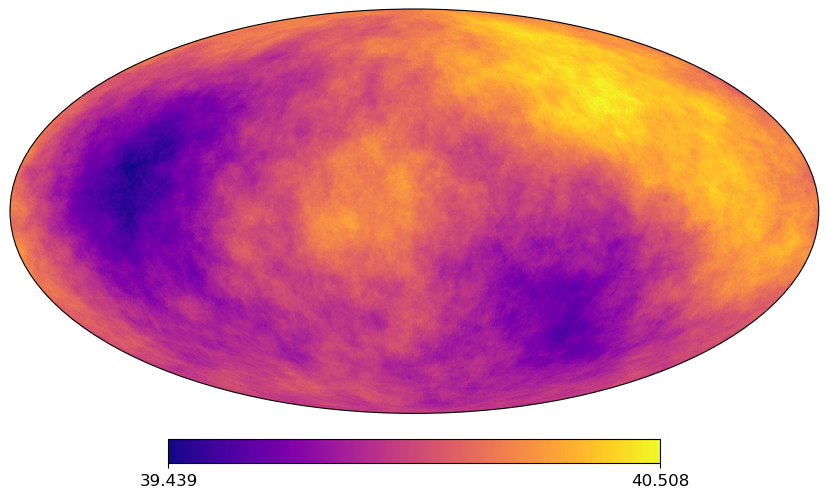

In [119]:
# === DIPOLE ===
np.random.seed(42)
N_bar = 40
D = 0.007
dipole_theta = np.deg2rad(48)
dipole_phi = -np.deg2rad(360-264)
pixels = np.vstack(hp.pix2vec(NSIDE, np.arange(NPIX)))
dipole_vec = hp.ang2vec(dipole_theta, dipole_phi)
dot_product = np.dot(dipole_vec, pixels)
angles = np.arccos(dot_product)
dipole_signal = D*np.cos(angles)

# === QUADRUPOLE ===
theta1, phi1 = np.deg2rad(90+27.1), -np.deg2rad(360-302.9)
theta2, phi2 = np.deg2rad(90-27.1), np.deg2rad(122.9)
q_vector_1 = [theta1, phi1]
q_vector_2 = [theta2, phi2]
pixels = hp.pix2vec(NSIDE, np.arange(NPIX))
a = hp.ang2vec(theta1, phi1)
b = hp.ang2vec(theta2, phi2)
Q_prime = np.outer(a, b)
Q_star = 0.5 * (Q_prime + Q_prime.T)
Q_hat = Q_star - (np.trace(Q_star)/3 * np.eye(3))
Q = 0.014
quadrupole_signal = Q * np.einsum('ij,i...,j...', Q_hat, pixels, pixels)

m_raw = 1 + dipole_signal + quadrupole_signal
m, lambda_ = dipole_quad_sampling(NSIDE, N_bar, D, Q, [dipole_theta, dipole_phi], q_vector_1, q_vector_2)

smooth_map = compute_smooth_map(m, angle_scale=1)
hp.projview(smooth_map, cmap="plasma", title=None, hold=True)
hp.graticule(dpar=30, dmer=60, color='gray', lw=2, ls='-', alpha=0)
plt.tight_layout()
# plt.savefig('../Thesis_images/dipole_quadrupole_skymap.png', dpi=300)
# plt.savefig('../Thesis_images/dipole_quadrupole_skymap.pdf', dpi=300)

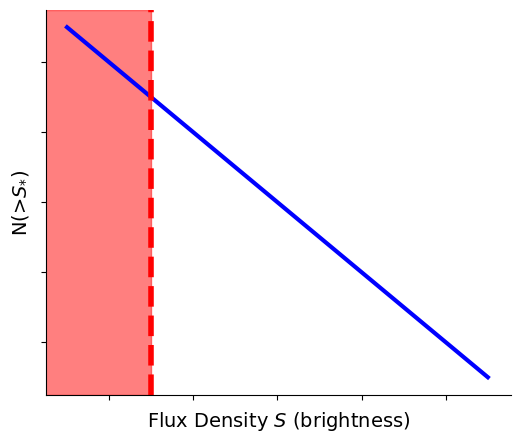

In [175]:
import numpy as np
import matplotlib.pyplot as plt

flux = np.linspace(0, 10, 100)
N = flux * -1

plt.figure(figsize=(6, 5))

# Fill to the left of the vertical line (full height of plot)
plt.axvspan(-1, 2, color='red', alpha=0.5)

# Plot the curve and the vertical line on top
plt.plot(flux, N, color='blue', linewidth=3)
plt.axvline(2, color='red', linestyle='--', linewidth=4)

# Axis labels only
plt.xlabel(r'Flux Density $S$ (brightness)', fontsize=14)
plt.ylabel(r'N(>$S_{*}$)', fontsize=14)

# Remove tick labels
plt.xticks([1, 3, 5, 7, 9], [])
plt.yticks([-1, -3, -5, -7, -9], [])
plt.xlim(-0.5,)
# Remove top and right borders
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('../Thesis_images/E_and_B_sources.png', dpi=300)
plt.show()


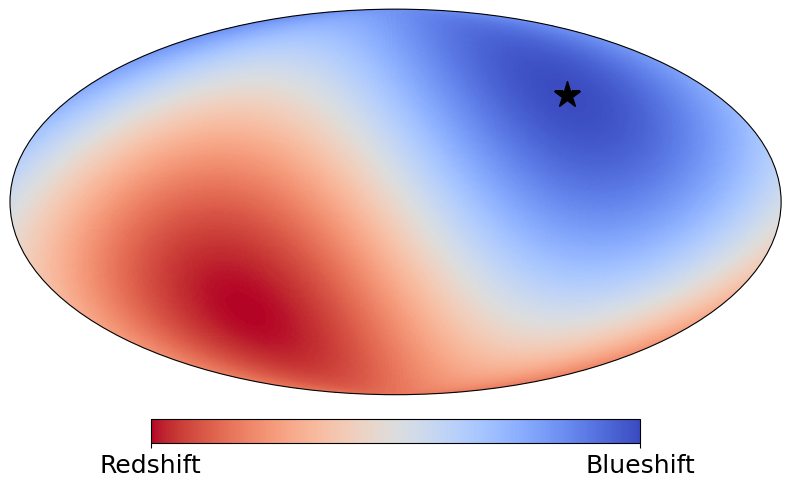

In [193]:
# === DIPOLE ===
np.random.seed(42)
N_bar = 40
D = 0.007
dipole_theta = np.deg2rad(48)
dipole_phi = -np.deg2rad(360-264)
pixels = np.vstack(hp.pix2vec(NSIDE, np.arange(NPIX)))
dipole_vec = hp.ang2vec(dipole_theta, dipole_phi)
dot_product = np.dot(dipole_vec, pixels)
angles = np.arccos(dot_product)
dipole_signal = D*np.cos(angles)

m = 1 + dipole_signal

hp.projview(m, cmap="coolwarm_r", title=None)
hp.newprojplot(dipole_theta, dipole_phi, '*', color='black', markersize=20)
#turn off cbar ticks
cbar = plt.gci().colorbar
#choose which values to label
cbar.set_ticks([np.min(m), np.max(m)])
cbar.set_ticklabels(['Redshift', 'Blueshift'], fontsize=18)

plt.savefig('../Thesis_images/dipole_skymap.png', dpi=300)
plt.show()

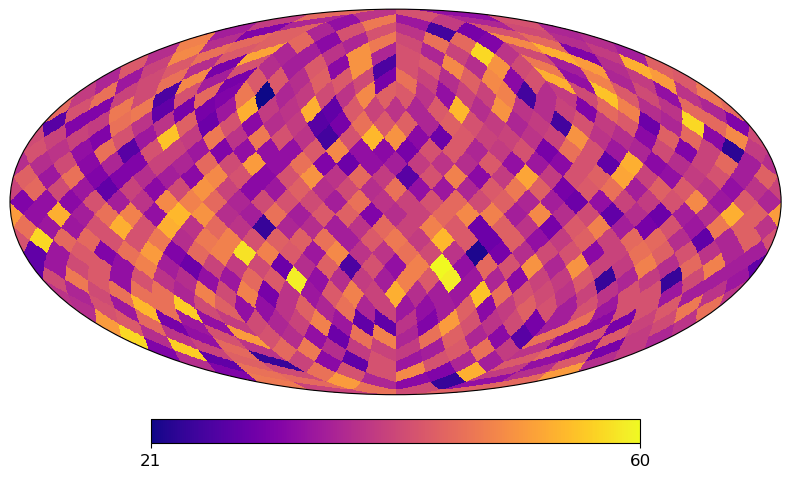

In [10]:
np.random.seed(42)
NSIDE=8
NPIX = hp.nside2npix(NSIDE)
N_bar = 40
D = 0.007
dipole_theta = np.deg2rad(48)
dipole_phi = -np.deg2rad(360-264)
pixels = np.vstack(hp.pix2vec(NSIDE, np.arange(NPIX)))
dipole_vec = hp.ang2vec(dipole_theta, dipole_phi)
dot_product = np.dot(dipole_vec, pixels)
angles = np.arccos(dot_product)
dipole_signal = D*np.cos(angles)

lambda_ = N_bar * (1 + dipole_signal)
sample = np.random.poisson(lambda_)

hp.projview(sample, cmap="plasma", title=None)
# hp.newprojplot(dipole_theta, dipole_phi, '*', color='black', markersize=20)
plt.savefig('../Thesis_images/dipole_skymap_lowres.pdf', dpi=300)

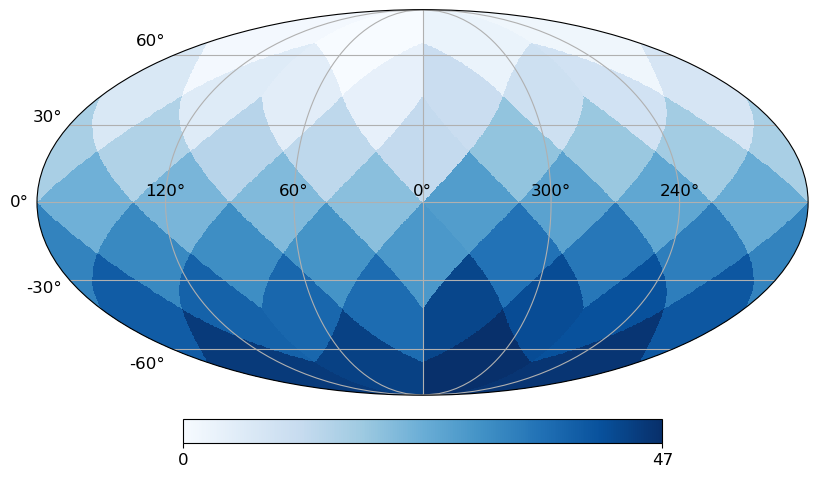

In [39]:
NSIDE = 2
NPIX = hp.nside2npix(NSIDE)
# make an array of nans
m = np.full(NPIX, np.nan)
m= np.arange(NPIX)
hp.projview(m, cmap="Blues", graticule=True, graticule_labels=True, title=None)
plt.savefig('../Thesis_images/NSIDE2_skymap.pdf', dpi=300)
plt.show()